# 2022 D.N.A. 코딩 테스트

In [1]:
!pip install pandas
!pip install numpy

import pandas as pd
import numpy as np

|내용|설명|
|--|--|
|id|선수 고유의 아이디|
|name|이름|
|age|나이|
|continent|선수들의 국적이 포함되어 있는 대륙|
|contract_until|선수의 계약기간|
|position|선수가 선호하는 포지션|
|prefer_foot|선수가 선호하는 발 ex) 오른발|
|reputation|선수가 유명한 정도 ex) 높은 수치일 수록 유명한 선수|
|stat_overall|선수의 현재 능력치|
|stat_potential|선수가 경험 및 노력을 통해 발전할 수 있는 정도|
|stat_skill_moves|선수의 개인기 능력치|
|value|FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로)|

In [2]:
data = pd.read_csv('FIFA_train.csv')
data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [3]:
test = pd.read_csv('FIFA_test.csv')
test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


## 데이터 전처리
+ 데이터 타입 확인
+ 결측값 확인
+ 데이터 변환

### train 데이터 전처리

In [4]:
#데이터 타입 확인
data.dtypes

id                    int64
name                 object
age                   int64
continent            object
contract_until       object
position             object
prefer_foot          object
reputation          float64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
value               float64
dtype: object

In [5]:
#데이터 결측값 확인
data.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

In [6]:
#칼럼별 고유값 확인
columns = data.columns
for i in columns:
    print(data[i].unique())

[    0     3     7 ... 16941 16942 16948]
['L. Messi' 'De Gea' 'L. Suárez' ... 'N. Fuentes' 'J. Milli'
 'N. Christoffersson']
[31 27 32 25 26 29 33 30 40 24 28 34 23 22 35 36 21 18 19 37 20 39 17 38
 16]
['south america' 'europe' 'africa' 'asia' 'oceania']
['2021' '2020' '2019' '2023' '2022' '2024' 'Jun 30, 2019' '2026'
 'Dec 31, 2018' '2018' '2025' 'Jun 30, 2020' 'May 31, 2020' 'May 31, 2019'
 'Jan 31, 2019' 'Jan 1, 2019' 'Jan 12, 2019']
['ST' 'GK' 'DF' 'MF']
['left' 'right']
[5. 4. 3. 1. 2.]
[94 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70 69
 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47]
[94 93 91 90 92 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71
 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 50 48]
[4. 1. 3. 2. 5.]
[1.105e+08 7.200e+07 8.000e+07 5.100e+07 6.800e+07 4.400e+07 6.000e+07
 6.300e+07 5.800e+07 5.350e+07 5.150e+07 3.800e+07 2.700e+07 6.950e+07
 5.950e+07 6.200e+07 7.350e+07 5.900e+07 4.600e+07 3.600e+07 5.

+ 각 열의 고유값 파악
    + contract_until (계약기간) 변수 전처리 필요
        + 년도만 나타난 값을 12월 31일로 설정 ex) Dec 31, 2019
        + 이후에 데이트타임으로 변경

In [7]:
#data['contract_until']의 고유값 확인
data['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

In [8]:
#연도만 나타난 값 처리

years = []
for i in data['contract_until']:
    if len(i) == 4 :
        years.append('Dec 31, '+i)
    else :
        years.append(i)

data['contract_until'] = years
data['contract_until']

0       Dec 31, 2021
1       Dec 31, 2020
2       Dec 31, 2021
3       Dec 31, 2020
4       Dec 31, 2021
            ...     
8927    Dec 31, 2019
8928    Dec 31, 2020
8929    Dec 31, 2021
8930    Dec 31, 2021
8931    Dec 31, 2020
Name: contract_until, Length: 8932, dtype: object

In [9]:
#계약 날짜 수정 확인
data['contract_until'].unique()

array(['Dec 31, 2021', 'Dec 31, 2020', 'Dec 31, 2019', 'Dec 31, 2023',
       'Dec 31, 2022', 'Dec 31, 2024', 'Jun 30, 2019', 'Dec 31, 2026',
       'Dec 31, 2018', 'Dec 31, 2025', 'Jun 30, 2020', 'May 31, 2020',
       'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019', 'Jan 12, 2019'],
      dtype=object)

In [10]:
#데이트타임으로 변경 및 적용
!pip install datetime
import datetime as dt

data['contract_until'] = pd.to_datetime(data['contract_until'])
data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021-12-31,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020-12-31,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021-12-31,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020-12-31,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021-12-31,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019-12-31,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020-12-31,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021-12-31,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021-12-31,GK,right,1.0,47,65,1.0,50000.0


In [11]:
#데이터 변경 확인
print(data.dtypes)
print('----------------')
columns = data.columns
for i in columns:
    print(data[i].unique())

id                           int64
name                        object
age                          int64
continent                   object
contract_until      datetime64[ns]
position                    object
prefer_foot                 object
reputation                 float64
stat_overall                 int64
stat_potential               int64
stat_skill_moves           float64
value                      float64
dtype: object
----------------
[    0     3     7 ... 16941 16942 16948]
['L. Messi' 'De Gea' 'L. Suárez' ... 'N. Fuentes' 'J. Milli'
 'N. Christoffersson']
[31 27 32 25 26 29 33 30 40 24 28 34 23 22 35 36 21 18 19 37 20 39 17 38
 16]
['south america' 'europe' 'africa' 'asia' 'oceania']
['2021-12-31T00:00:00.000000000' '2020-12-31T00:00:00.000000000'
 '2019-12-31T00:00:00.000000000' '2023-12-31T00:00:00.000000000'
 '2022-12-31T00:00:00.000000000' '2024-12-31T00:00:00.000000000'
 '2019-06-30T00:00:00.000000000' '2026-12-31T00:00:00.000000000'
 '2018-12-31T00:00:00.000000000'

### test 데이터 전처리

In [12]:
#데이터 타입 확인
test.dtypes

id                    int64
name                 object
age                   int64
continent            object
contract_until       object
position             object
prefer_foot          object
reputation          float64
stat_overall          int64
stat_potential        int64
stat_skill_moves    float64
dtype: object

In [13]:
#데이터 결측값 확인
test.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
dtype: int64

In [14]:
#칼럼별 고유값 확인
columns = test.columns
for i in columns:
    print(test[i].unique())

[    1     2     4 ... 16932 16937 16943]
['Cristiano Ronaldo' 'Neymar Jr' 'K. De Bruyne' ... 'Y. Góez' 'A. Kaltner'
 'K. Fujikawa']
[33 26 27 32 29 28 24 30 19 25 31 22 23 37 35 34 36 21 20 40 38 18 39 17
 42 16]
['europe' 'south america' 'africa' 'asia' 'oceania']
['2022' '2023' '2020' '2021' 'Jun 30, 2019' '2019' '2025' '2024' '2018'
 'May 31, 2020' 'Jun 30, 2020' 'May 31, 2019' 'Dec 31, 2019'
 'Dec 31, 2018' 'Jun 1, 2019' 'Jan 1, 2019' 'Jan 31, 2019' '2026']
['ST' 'MF' 'DF' 'GK']
['right' 'left']
[5. 4. 3. 2. 1.]
[94 92 91 90 89 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72 71 70
 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53 52 51 50 49 48 47]
[94 93 92 91 90 89 95 88 87 86 85 84 83 82 81 80 79 78 77 76 75 74 73 72
 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 52]
[5. 4. 3. 2. 1.]


In [15]:
#test['contract_until']의 고유값 확인
test['contract_until'].value_counts()

2021            985
2019            943
2020            882
2022            338
2023            251
Jun 30, 2019    209
2018            155
Dec 31, 2018     34
May 31, 2019     14
2025              4
Jun 30, 2020      4
2024              2
Jan 31, 2019      2
Jan 1, 2019       1
May 31, 2020      1
Jun 1, 2019       1
Dec 31, 2019      1
2026              1
Name: contract_until, dtype: int64

In [16]:
#연도만 나타난 값 처리

years = []
for i in test['contract_until']:
    if len(i) == 4 :
        years.append('Dec 31, '+i)
    else :
        years.append(i)

test['contract_until'] = years
test['contract_until']

0       Dec 31, 2022
1       Dec 31, 2022
2       Dec 31, 2023
3       Dec 31, 2020
4       Dec 31, 2020
            ...     
3823    Dec 31, 2021
3824    Dec 31, 2018
3825    Dec 31, 2021
3826    Dec 31, 2020
3827    Dec 31, 2021
Name: contract_until, Length: 3828, dtype: object

In [17]:
#계약 날짜 수정 확인
test['contract_until'].unique()

array(['Dec 31, 2022', 'Dec 31, 2023', 'Dec 31, 2020', 'Dec 31, 2021',
       'Jun 30, 2019', 'Dec 31, 2019', 'Dec 31, 2025', 'Dec 31, 2024',
       'Dec 31, 2018', 'May 31, 2020', 'Jun 30, 2020', 'May 31, 2019',
       'Jun 1, 2019', 'Jan 1, 2019', 'Jan 31, 2019', 'Dec 31, 2026'],
      dtype=object)

In [18]:
#데이트타임으로 변경 및 적용
test['contract_until'] = pd.to_datetime(test['contract_until'])
test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022-12-31,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022-12-31,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023-12-31,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020-12-31,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020-12-31,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021-12-31,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018-12-31,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021-12-31,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020-12-31,ST,right,1.0,47,61,2.0


## EDA
+ id, name 을 제외하고 EDA
+ bar : age, continent, contract_until, position, prefer_foot, reputation, stat_overall, stat_potential, stat_skill_moves

In [19]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [20]:
data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021-12-31,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020-12-31,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021-12-31,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020-12-31,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021-12-31,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019-12-31,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020-12-31,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021-12-31,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021-12-31,GK,right,1.0,47,65,1.0,50000.0


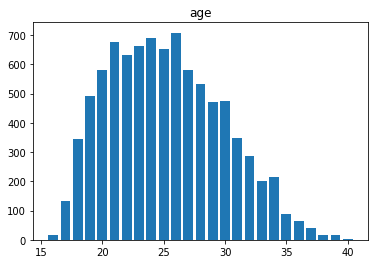

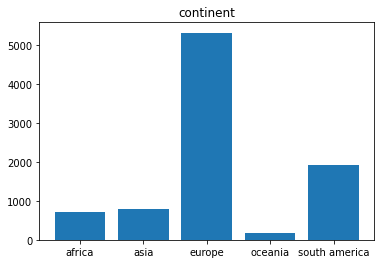

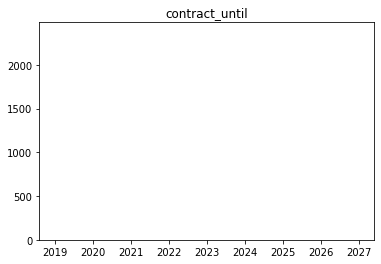

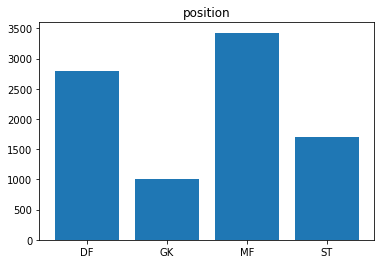

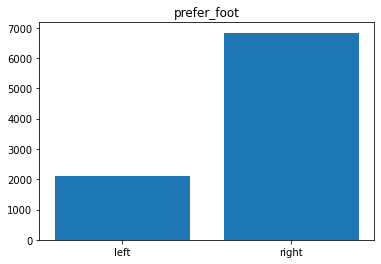

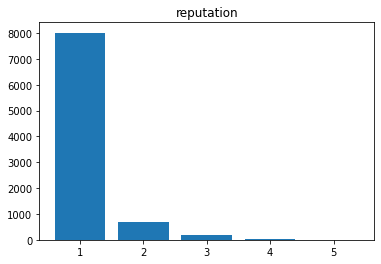

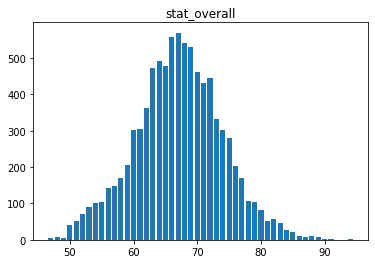

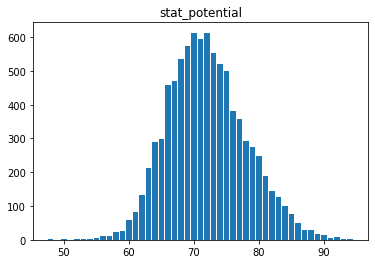

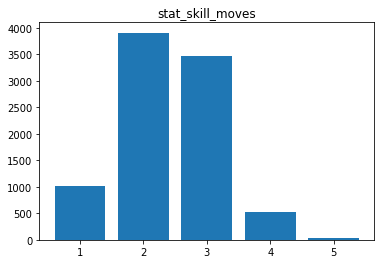

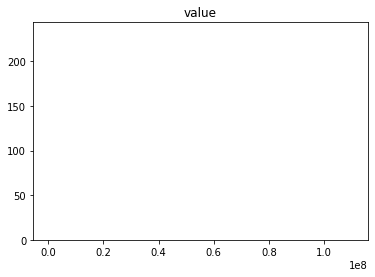

In [21]:
#막대 그래프
for i in range(2,len(data.columns)):
    plt.bar(data.groupby([data.columns[i]]).count().index,data.groupby([data.columns[i]]).count()['id'])
    plt.title(data.columns[i])
    plt.show()

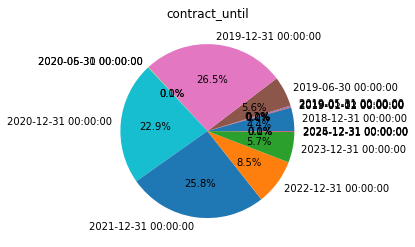

In [22]:
plt.pie(data.groupby(['contract_until']).count()['id'], labels = data.groupby(['contract_until']).count().index, autopct='%.1f%%', startangle=0, counterclock=True)
plt.title('contract_until')
plt.show()

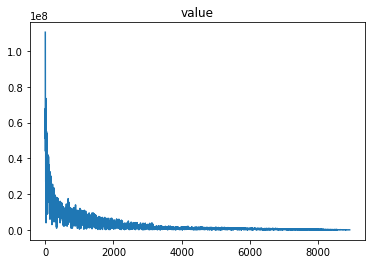

In [23]:
plt.plot(data['value'])
plt.title('value')
plt.show()

In [24]:
print(np.mean(data['age']))
print(np.mean(data['reputation']))
print(np.mean(data['stat_overall']))
print(np.mean(data['stat_potential']))
print(np.mean(data['stat_skill_moves']))
print(np.mean(data['value']))

25.209135691894314
1.1308777429467085
67.0911330049261
71.99720107478728
2.4017017465293327
2778673.3094491716


## 모델링
+ 라벨인코딩
+ 정규화
+ 모델링 적용
    + 결정 트리 
    + 회귀
    + 
+ test 적용

In [25]:
data

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021-12-31,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020-12-31,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021-12-31,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020-12-31,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021-12-31,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019-12-31,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020-12-31,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021-12-31,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021-12-31,GK,right,1.0,47,65,1.0,50000.0


In [26]:
values= data.values[:,2:]
values

array([[31, 'south america', Timestamp('2021-12-31 00:00:00'), ..., 94,
        4.0, 110500000.0],
       [27, 'europe', Timestamp('2020-12-31 00:00:00'), ..., 93, 1.0,
        72000000.0],
       [31, 'south america', Timestamp('2021-12-31 00:00:00'), ..., 91,
        3.0, 80000000.0],
       ...,
       [18, 'south america', Timestamp('2021-12-31 00:00:00'), ..., 64,
        2.0, 50000.0],
       [18, 'europe', Timestamp('2021-12-31 00:00:00'), ..., 65, 1.0,
        50000.0],
       [19, 'europe', Timestamp('2020-12-31 00:00:00'), ..., 63, 2.0,
        60000.0]], dtype=object)

In [27]:
!pip install sklearn

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#trian 데이터 전처리
values[:,1] = encoder.fit_transform(values[:,1])
values[:,2] = encoder.fit_transform(values[:,2])
values[:,3] = encoder.fit_transform(values[:,3])
values[:,4] = encoder.fit_transform(values[:,4])

In [29]:
#정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

X = scaled[:,:-1]
y = scaled[:,-1]

X = values[:,:-1]
y = values[:,-1]

In [30]:
t_values = test.values[:,2:]

#test 데이터 전처리
t_values[:,1] = encoder.fit_transform(t_values[:,1])
t_values[:,2] = encoder.fit_transform(t_values[:,2])
t_values[:,3] = encoder.fit_transform(t_values[:,3])
t_values[:,4] = encoder.fit_transform(t_values[:,4])

x = t_values

In [31]:
#데이터 셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 결정 트리 (회귀)

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [34]:
yhat = dtree_reg.predict(X_test)
print(yhat)

[0.00782876 0.00850756 0.00782876 ... 0.01077021 0.00285094 0.01167526]


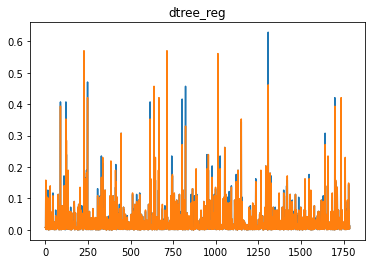

In [35]:
plt.plot(y_test)
plt.plot(yhat)
plt.title('dtree_reg')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print('예측성능 비교지표 RMSE: %.3f' % rmse)

예측성능 비교지표 RMSE: 0.010


#### test 적용

In [37]:
x = scaler.fit_transform(x)
dtree = dtree_reg.predict(x)
print(dtree)

dtree_pred = dtree*(max(data['value'])-min(data['value']))+min(data['value'])
dtree_pred

[1.00000000e+00 7.23956919e-01 7.23956919e-01 ... 3.62023713e-04
 2.71517784e-04 2.71517784e-04]


array([1.105e+08, 8.000e+07, 8.000e+07, ..., 5.000e+04, 4.000e+04,
       4.000e+04])

### 회귀

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
print(lin_pred)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
print('예측성능 비교지표 RMSE: %.3f' % rmse)

x = scaler.fit_transform(x)
lin = lin_reg.predict(x)
lin_pred = lin*(max(data['value'])-min(data['value']))+min(data['value'])
print(lin_pred)

[0.02505886 0.03178613 0.03338664 ... 0.03503389 0.00595708 0.03265097]
예측성능 비교지표 RMSE: 0.032
[37536596.32324287 39271627.90498683 32073465.56527463 ...
 -3865420.27978954 -4210405.79510682 -4723991.62161371]


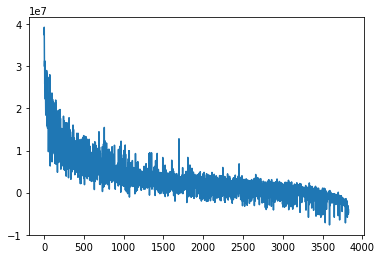

In [39]:
plt.plot(lin_pred)

In [40]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
ridge = ridge_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, ridge))
print('예측성능 비교지표 RMSE: %.3f' % rmse)

x = scaler.fit_transform(x)
ridge = ridge_reg.predict(x)
ridge_pred = ridge*(max(data['value'])-min(data['value']))+min(data['value'])
print(ridge_pred)

예측성능 비교지표 RMSE: 0.032
[37249387.66644491 38794289.18069473 31719038.53953673 ...
 -3865048.23906968 -4300068.53570766 -4771677.65994748]


In [41]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso = lasso_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, lasso))
print('예측성능 비교지표 RMSE: %.3f' % rmse)

x = scaler.fit_transform(x)
lasso = lasso_reg.predict(x)
lasso_pred = lasso*(max(data['value'])-min(data['value']))+min(data['value'])
print(lasso_pred)

예측성능 비교지표 RMSE: 0.054
[2768151.85444367 2768151.85444367 2768151.85444367 ... 2768151.85444367
 2768151.85444367 2768151.85444367]


In [42]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(X_train, y_train)
elastic = elastic_net.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, elastic))
print('예측성능 비교지표 RMSE: %.3f' % rmse)

x = scaler.fit_transform(x)
elastic = elastic_net.predict(x)
elastic_pred = elastic*(max(data['value'])-min(data['value']))+min(data['value'])
print(elastic_pred)

예측성능 비교지표 RMSE: 0.054
[2768151.85444367 2768151.85444367 2768151.85444367 ... 2768151.85444367
 2768151.85444367 2768151.85444367]


### 제출

In [43]:
sub = pd.read_csv('submission.csv')

In [44]:
sub_1 = sub
sub_1['value'] = dtree_pred
sub_1
sub_1.to_csv('sub_dtree.csv')

In [45]:
sub_1 = sub
sub_1['value'] = lin_pred
sub_1.to_csv('sub_lin_pred.csv')

In [46]:
sub_1 = sub
sub_1['value'] = ridge_pred
sub_1.to_csv('sub_ridge_pred.csv')

In [47]:
sub_1 = sub
sub_1['value'] = lasso_pred
sub_1.to_csv('sub_lasso_pred.csv')

In [48]:
sub_1 = sub
sub_1['value'] = elastic_pred
sub_1.to_csv('sub_elastic_pred.csv')